In [1]:
import numpy as np

def intrinsic_dim_2nn_from_dist_matrix(D):
    """
    Compute the local 2-Nearest-Neighbors (2NN) intrinsic dimensionality
    for each point, given a distance matrix D.
    
    Parameters
    ----------
    D : ndarray of shape (n_samples, n_samples)
        Distance matrix where D[i, j] is the distance from point i to point j.
        We expect D[i, i] = 0 (distance to itself).
    
    Returns
    -------
    local_id : ndarray of shape (n_samples,)
        The 2NN intrinsic dimension estimates for each sample.
    """
    n = D.shape[0]
    local_id = np.zeros(n, dtype=float)

    for i in range(n):
        # Extract distances from point i to others
        # Ignore the diagonal (distance to itself = 0), we don't consider that a neighbor.
        row = D[i].copy()
        row[i] = np.inf  # So it doesn't get chosen as a "neighbor"

        # Sort distances in ascending order
        sorted_dists = np.sort(row)
        
        # The 1st neighbor distance (r1) is the smallest non-diagonal distance
        r1 = sorted_dists[0]
        # The 2nd neighbor distance (r2) is the second-smallest
        r2 = sorted_dists[1]

        # Compute the 2NN local ID = ln(2) / ln(r2 / r1)
        # Watch out for numerical issues: 0 distances, identical distances, etc.
        if r1 <= 0 or r2 <= 0 or r2 == r1:
            local_id[i] = np.nan
        else:
            local_id[i] = np.log(2.0) / np.log(r2 / r1)
    
    return local_id

In [2]:
import numpy as np

distance_matrix = np.load("distance_matrix_mean.npy")

In [3]:
# from sklearn.manifold import MDS
# 
# mds = MDS(n_components=2, dissimilarity="precomputed")
# feature_matrix = mds.fit_transform(distance_matrix)

In [4]:
distance_matrix = (distance_matrix - 100) * -1 

In [5]:
distance_matrix += .0000001

In [6]:
distance_matrix.shape

(36900, 36900)

In [7]:
distance_matrix = distance_matrix / 100

In [8]:
distance_matrix

array([[1.00000000e-09, 9.92845001e-01, 9.92855001e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.92845001e-01, 1.00000000e-09, 9.90350001e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.92855001e-01, 9.90350001e-01, 1.00000000e-09, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e-09, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e-09, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e-09]])

In [9]:
ids = intrinsic_dim_2nn_from_dist_matrix(distance_matrix)

In [10]:
list(ids)

[68819.1178899271,
 275.4800198195862,
 274.38168154690476,
 11499.600544885803,
 8634.317823774796,
 8095.612498559255,
 19637.503279748118,
 22901.92944058344,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 673.2293336681234,
 654.0041085041704,
 nan,
 nan,
 543.2204681332279,
 543.2204681332279,
 34371.95571001927,
 1429.9626069401731,
 1429.9626069401731,
 1429.9626069401731,
 1429.9626069401731,
 226.38648073091676,
 46004.75604205464,
 nan,
 415.18354758903024,
 415.18354758903024,
 nan,
 8580.902169148532,
 8580.902169148532,
 nan,
 nan,
 366.5425895926177,
 366.5425895926177,
 179.87418917328662,
 163.84489613187156,
 164.57080661086903,
 165.16225217466038,
 nan,
 nan,
 328.8650508252809,
 324.9818508010082,
 2553.77241307263,
 nan,
 34412.331533177356,
 nan,
 22883.214466734124,
 22883.214466734124,
 22883.214466734124,
 22883.214466734124,
 22883.214466734124,
 22883.214466734124,
 22883.214466734124,
 22883.214466734124,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 na

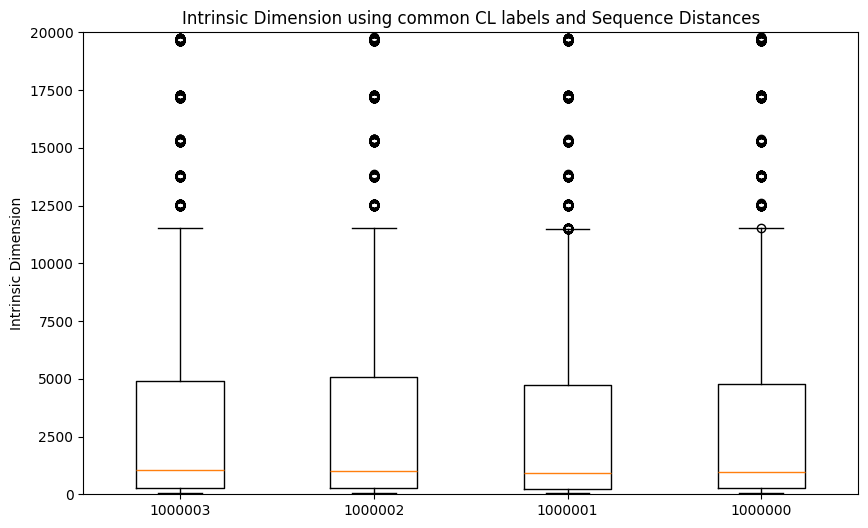

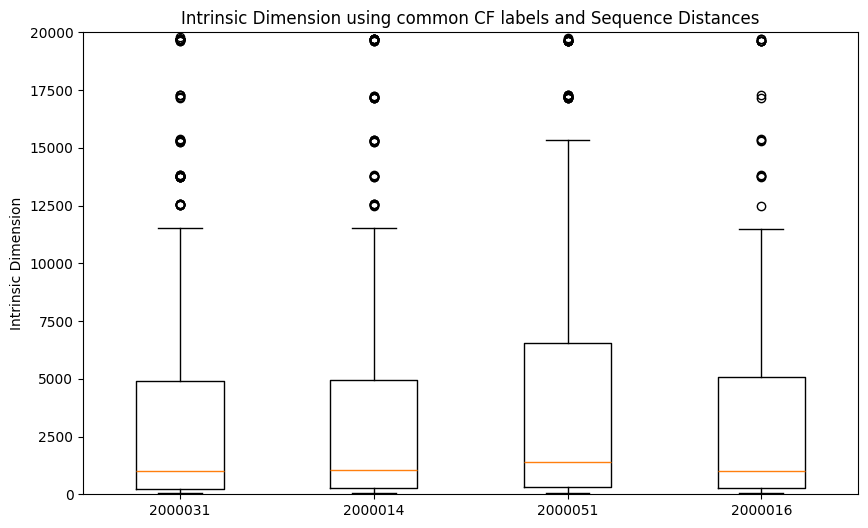

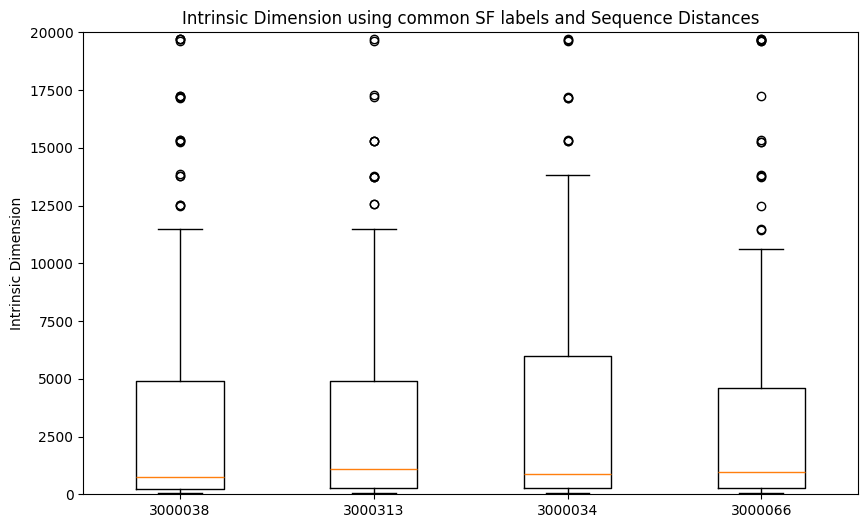

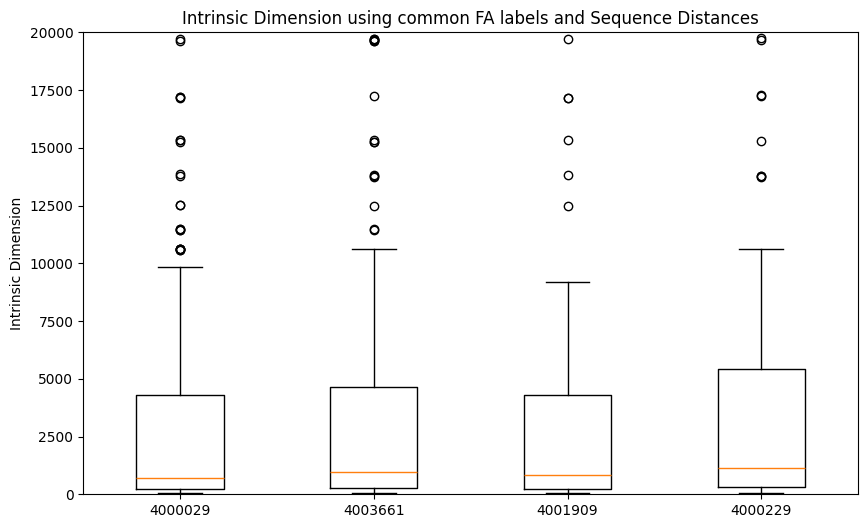

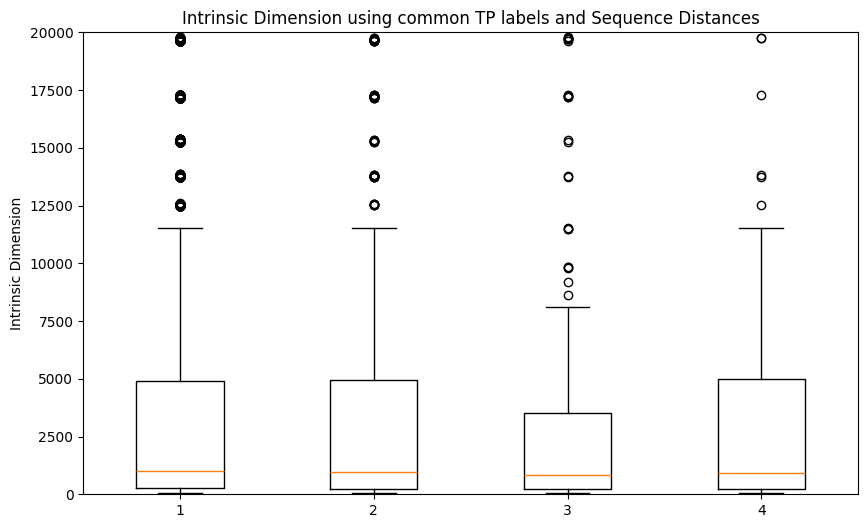

In [13]:
from utils import  filter_by_label, create_box_plot, load_labels, common_labels

labels = load_labels()
for label_type in common_labels.keys():
    results = []
    for label_value in common_labels[label_type]:
        indexes = filter_by_label(labels, label_type, label_value)
        label_int_dim = ids[indexes]
        label_int_dim = label_int_dim[~np.isnan(label_int_dim)]
        results.append(label_int_dim)
        
    create_box_plot(results, common_labels[label_type], "Intrinsic Dimension", f"Intrinsic Dimension using common {label_type} labels and Sequence Distances", model_name=f"RealProteins_{label_type}", save_dir="./../results/intrinsic_dimension/data/", ylim=(0, 20000))
